In [10]:
from google.colab import files
uploaded = files.upload()

Saving tripadvisor_hotel_reviews.csv to tripadvisor_hotel_reviews.csv


In [209]:
## Open dataset
import pandas as pd

data = pd.read_csv('tripadvisor_hotel_reviews.csv')

In [210]:
# Taje a look at the data
data.head(100)

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5
...,...,...
95,"excellent stay staff friendly helpful, nice ho...",4
96,return going seattle booked hotel knowing budg...,4
97,terrible hotel approximately 2 weeks ago april...,1
98,great price okay experience stayed inn queen a...,3


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


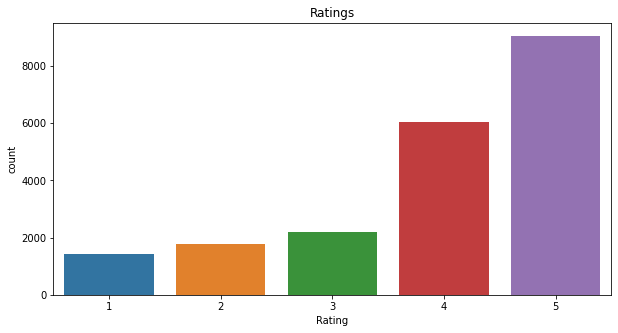

In [211]:
## Inspect the distribution of ratings
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,5))
sns.countplot(data['Rating'])
plt.title('Ratings')
plt.show()

In [212]:
## For simplicity we could create 2 different categories as 'good' and 'bad' using the ratings.
## However, in this case we will create 3 different categories : 'bad', 'good','excellent'.
## Rating of 1 and 2 will be 'bad', ratings of 3 will be 'neutral' and ratings of 4 and 5 will be 'excellent'.


def rating(score):

    rating = score
 
    if rating < 3: 
        return 0
    if rating == 3:
      return 2
    if rating >=4 :
      return 1  


data['new_rating']=  data['Rating'].apply(rating)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


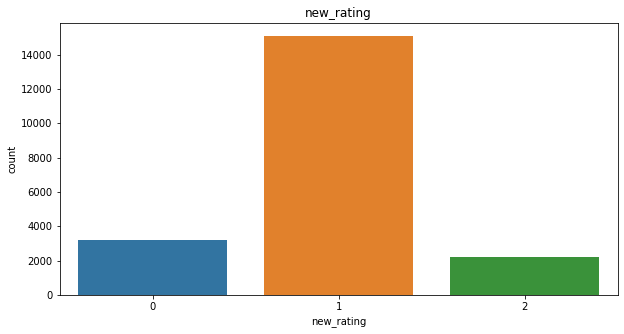

In [213]:
## Plot the new rating groups distribution 

plt.figure(figsize=(10,5))
sns.countplot(data['new_rating'])
plt.title('new_rating')
plt.show()

In [214]:
### PREPROCESSING ### 


from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

## Remove punctuations

def clean_text(x):
    custom_punctuation =['.',',','@','#','$','%',':','?','/','<','>','{','}','[',']','*']
    x = str(x)
    for punct in custom_punctuation:
        x = x.replace(punct, '')
        final =str(x)
        

    return final

data['Review']=data['Review'].apply(clean_text)

def preprocess (text):
    # remove whitespace
    text =text.str.replace(r'^\s+|\s+?$','')
    text = text.replace('<[^>]*>', '' )  
    #remove links
    text = text.replace(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', '')
    #remove mulpiple spaces 
    text = text.replace(r'\s+', ' ')
    # Keep words that are only uppercase. Customers use to 'shout' and 'yell' when expressing excitement or frustration
    tokenized_tweet= text.apply(lambda x: " ".join( a if a.isupper() else a.lower()
    for a in x.split() ))
    #tokenize  
    tokenized_tweet = text.apply(lambda x: x.split())
    ## also remove stopwords
    tokenized_tweet=  tokenized_tweet.apply(lambda x: [item for item in x  if item not in stop_words])
    
    
    for i in range(len(tokenized_tweet)):
        tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
        tweets_p= tokenized_tweet
    
    return tweets_p
    
    
data['Review']=preprocess(data['Review'])

In [215]:
data['Review'].head(50)

0     nice hotel expensive parking got good deal sta...
1     ok nothing special charge diamond member hilto...
2     nice rooms 4 experience hotel monaco seattle g...
3     unique great stay wonderful time hotel monaco ...
4     great stay great stay went seahawk game awesom...
5     love monaco staff husband stayed hotel crazy w...
6     cozy stay rainy city husband spent 7 nights mo...
7     excellent staff housekeeping quality hotel cho...
8     hotel stayed hotel monaco cruise rooms generou...
9     excellent stayed hotel monaco past delight rec...
10    poor value stayed monaco seattle july nice hot...
11    nice value seattle stayed 4 nights late 2007 l...
12    nice hotel good location hotel kimpton design ...
13    nice hotel nice staff hotel lovely staff quite...
14    great hotel night quick business trip loved li...
15    horrible customer service hotel stay february ...
16    disappointed say anticipating stay hotel monac...
17    fantastic stay monaco seattle hotel monaco

In [200]:
# Vectorize the text 

from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf = TfidfVectorizer(analyzer= 'word', ngram_range=(1, 3), min_df=5, lowercase=False, preprocessor=None) # we use unigrams and trigrams

In [201]:
## Split the dataset into train and test

from sklearn.model_selection import train_test_split
X, y = data['Review'], data['new_rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [202]:
X_train=tf_idf.fit_transform(X_train)
X_test= tf_idf.transform(X_test)

In [218]:
## The first model will be Linear CVC
from sklearn.svm import LinearSVC
model = LinearSVC(C=1.6).fit(X_train,y_train)
y_preds = model.predict(X_test)
# y_preds
from sklearn.metrics import classification_report
report = classification_report(y_test, y_preds )
print(report)


              precision    recall  f1-score   support

           0       0.78      0.76      0.77       955
           1       0.90      0.97      0.93      4548
           2       0.48      0.25      0.33       645

    accuracy                           0.86      6148
   macro avg       0.72      0.66      0.68      6148
weighted avg       0.84      0.86      0.84      6148



In [219]:
# The second model is Logistic Regression 

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=1, C=0.8)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
y_pred_tr = classifier.predict(X_train)
report = classification_report(y_test, y_pred )
print(report)

              precision    recall  f1-score   support

           0       0.82      0.70      0.75       955
           1       0.86      0.99      0.92      4548
           2       0.54      0.11      0.19       645

    accuracy                           0.85      6148
   macro avg       0.74      0.60      0.62      6148
weighted avg       0.82      0.85      0.82      6148



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [220]:
## We can see that both models fail to detect the neutral sentiment in the dataset although Linear SVM does give better results.
## We will try and see the most frequent words in each rating. 
## Later, we can also perform a grid search to further improve the results. 

In [221]:
## We will save time by using eli5, which however only works on linear models.
!pip install eli5

In [222]:
import eli5
eli5.show_weights(model, vec=tf_idf, top=50, ## print the top 50 represenative words for each rating
                  target_names=data.new_rating)

## as we can see, the results are quite satisfactory for the 'bad' and 'excellent' rating, but not for the 'neutral' rating. 


In [224]:
## Let's make some predictions

sent= ['it was an amazing experience. The hotel was clean and the staff lovely', 'absolutely horrible. The sheets were dirty and there was a strong smell',
       'it was an ok hotel, nothing spectacular']

sent= tf_idf.transform(sent)

model.predict(sent)

array([1, 0, 2])

RNN model 


In [151]:
# Import libraries 
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Dense, Embedding, GRU, Dropout, LSTM
from keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

In [152]:
t = Tokenizer()
t.fit_on_texts(data["Review"])
max_length = max([len(s.split()) for s in data["Review"] ])
max_legth=max_length 
vocab_size = len(t.word_index)+1

In [153]:
X_train, X_test, y_train, y_test = train_test_split(data["Review"], data["new_rating"], test_size=0.25)

In [154]:
X_train = t.texts_to_sequences(X_train)
X_test = t.texts_to_sequences(X_test)
X_train = pad_sequences(X_train, maxlen=max_length, padding = "post",truncating = "post")
X_test = pad_sequences(X_test, maxlen=max_length, padding = "post", truncating = "post")
X_train = X_train[0:28290]
y_train = y_train[0:28290]
X_test = X_test[0:9430]
y_test = y_test[0:9430]
len(y_test),len(X_test),len(X_train),len(y_train)

(5123, 5123, 15368, 15368)

In [155]:
from keras.utils import np_utils #converting to categorical
y_train = np_utils.to_categorical(y_train, num_classes=3)
y_test = np_utils.to_categorical(y_test, num_classes=3)

In [157]:
from keras.utils import np_utils #converting to categorical
embedding_dim = 100
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_length))
model.add(LSTM(units = 32))
model.add(Dense(3,activation="softmax")) #since converted to categorical we will have three output nodes. softmax
                                         # assigns a probability distribution
    
model.compile(loss="categorical_crossentropy", optimizer="adam",metrics=["accuracy"])
model.fit(X_train, y_train, batch_size=10, epochs=3)

Epoch 1/3
1537/1537 [==============================] - 85s 54ms/step - loss: 0.7598 - accuracy: 0.7364
Epoch 2/3
1537/1537 [==============================] - 84s 54ms/step - loss: 0.7563 - accuracy: 0.7364
Epoch 3/3
1537/1537 [==============================] - 84s 54ms/step - loss: 0.7558 - accuracy: 0.7364


In [158]:
model.evaluate(x=X_test, y=y_test, batch_size=10)

513/513 [==============================] - 13s 25ms/step - loss: 0.7542 - accuracy: 0.7371


[0.7542170882225037, 0.7370681166648865]

We can see that our RNN model did not yield a better performace than the SVM and Logistic Regression model.
Later, we can try some hyper parameter tuning and grid search. 